# 4-1. Pytorch Tutorial

## pakage import

In [1]:
import numpy as np

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

from torchvision import datasets, transforms

import matplotlib.pyplot as plt

## 4-1-1. Torch tensor란

In [ ]:
a = torch.tensor([[1.0, 4.0], [4.0, 3.0]], device=0)
b = torch.tensor([[4, 3], [1, 4], [1, 2]], dtype=torch.int64, device='cpu')
print(a)
print(b)

tensor([[1., 4.],
        [4., 3.]], device='cuda:0')
tensor([[4, 3],
        [1, 4],
        [1, 2]])


In [ ]:
print(a.dtype, a.device, a.shape)
print(b.dtype, b.device, b.shape)

torch.float32 cuda:0 torch.Size([2, 2])
torch.int64 cpu torch.Size([3, 2])


In [ ]:
a = torch.Tensor([[4, 2], [2, 1]])
print(a.dtype, a.device)

torch.float32 cpu


In [ ]:
a = torch.ones([2, 3])
b = torch.zeros([3, 2], dtype=torch.int64)
c = torch.eye(4)
d = torch.rand([2, 4, 3])  

In [ ]:
print(a)
print(b)
print(c)
print(d)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0, 0],
        [0, 0],
        [0, 0]])
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])
tensor([[[0.3145, 0.9455, 0.1947],
         [0.2652, 0.3791, 0.3721],
         [0.4361, 0.7967, 0.0696],
         [0.9716, 0.0476, 0.8572]],

        [[0.1304, 0.8133, 0.0749],
         [0.7270, 0.6376, 0.0318],
         [0.9444, 0.3746, 0.0669],
         [0.1307, 0.2664, 0.9708]]])


In [ ]:
d = np.array([[2, 5, 4], [4, 2, 1], [5, 7, 4]])
a = torch.tensor(d)
b = torch.from_numpy(d)

print(a)
print(b)
print(d)

tensor([[2, 5, 4],
        [4, 2, 1],
        [5, 7, 4]])
tensor([[2, 5, 4],
        [4, 2, 1],
        [5, 7, 4]])
[[2 5 4]
 [4 2 1]
 [5 7 4]]


In [ ]:
 d[0, 0] = 100
 print(a)
 print(b)

tensor([[2, 5, 4],
        [4, 2, 1],
        [5, 7, 4]])
tensor([[100,   5,   4],
        [  4,   2,   1],
        [  5,   7,   4]])


In [ ]:
b = torch.ones_like(a)
c = torch.zeros_like(a, dtype=torch.float)
d = torch.rand_like(a, dtype=torch.float)

print(b)
print(c)
print(d)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.5743, 0.4334, 0.2920],
        [0.9646, 0.5094, 0.7291],
        [0.8593, 0.6486, 0.2571]])


### gpu 사용

In [ ]:
torch.cuda.is_available()

True

In [ ]:
if torch.cuda.is_available():
  a = torch.tensor([[4, 3, 2], [1, 2, 3]])
  print(a)
  b = a.to('cuda')
  print(b)

tensor([[4, 3, 2],
        [1, 2, 3]])
tensor([[4, 3, 2],
        [1, 2, 3]], device='cuda:0')


In [ ]:
b[0][0] = 100
print(a)
print(b)

tensor([[4, 3, 2],
        [1, 2, 3]])
tensor([[100,   3,   2],
        [  1,   2,   3]], device='cuda:0')


### concat, stack, squeeze, unsqueeze

In [ ]:
a = torch.rand([2, 3])
b = torch.rand([2, 3])
print(a)
print(b)

tensor([[0.3062, 0.5970, 0.3831],
        [0.1304, 0.5641, 0.2215]])
tensor([[0.6166, 0.0990, 0.0286],
        [0.8445, 0.9684, 0.7971]])


In [ ]:
c = torch.cat([a, b], dim=0)
d = torch.cat([a, b], dim=1)
print(c)
print(c.shape)
print(d)
print(d.shape)

tensor([[0.3062, 0.5970, 0.3831],
        [0.1304, 0.5641, 0.2215],
        [0.6166, 0.0990, 0.0286],
        [0.8445, 0.9684, 0.7971]])
torch.Size([4, 3])
tensor([[0.3062, 0.5970, 0.3831, 0.6166, 0.0990, 0.0286],
        [0.1304, 0.5641, 0.2215, 0.8445, 0.9684, 0.7971]])
torch.Size([2, 6])


In [ ]:
c = torch.stack([a, b], dim=0)
d = torch.stack([a, b], dim=1)
e = torch.stack([a, b], dim=2)
print(c)
print(c.shape)
print(d)
print(d.shape)
print(e)
print(e.shape)

tensor([[[0.3062, 0.5970, 0.3831],
         [0.1304, 0.5641, 0.2215]],

        [[0.6166, 0.0990, 0.0286],
         [0.8445, 0.9684, 0.7971]]])
torch.Size([2, 2, 3])
tensor([[[0.3062, 0.5970, 0.3831],
         [0.6166, 0.0990, 0.0286]],

        [[0.1304, 0.5641, 0.2215],
         [0.8445, 0.9684, 0.7971]]])
torch.Size([2, 2, 3])
tensor([[[0.3062, 0.6166],
         [0.5970, 0.0990],
         [0.3831, 0.0286]],

        [[0.1304, 0.8445],
         [0.5641, 0.9684],
         [0.2215, 0.7971]]])
torch.Size([2, 3, 2])


In [ ]:
c = torch.hstack([a, b])
print(c)
print(c.shape)
d = torch.vstack([a, b])
print(d)
print(d.shape)

tensor([[0.3062, 0.5970, 0.3831, 0.6166, 0.0990, 0.0286],
        [0.1304, 0.5641, 0.2215, 0.8445, 0.9684, 0.7971]])
torch.Size([2, 6])
tensor([[0.3062, 0.5970, 0.3831],
        [0.1304, 0.5641, 0.2215],
        [0.6166, 0.0990, 0.0286],
        [0.8445, 0.9684, 0.7971]])
torch.Size([4, 3])


In [ ]:
print(a)
a = torch.unsqueeze(a, dim=1)
print(a)
print(a.shape)

a = torch.squeeze(a)
print(a)
print(a.shape)

tensor([[0.3062, 0.5970, 0.3831],
        [0.1304, 0.5641, 0.2215]])
tensor([[[0.3062, 0.5970, 0.3831]],

        [[0.1304, 0.5641, 0.2215]]])
torch.Size([2, 1, 3])
tensor([[0.3062, 0.5970, 0.3831],
        [0.1304, 0.5641, 0.2215]])
torch.Size([2, 3])


### Arithmetic operations

In [ ]:
a = torch.tensor(np.array(list(range(12)))).reshape(3, 4)
b = torch.tensor(np.array(list(range(8)))).reshape(4, 2)
print(np.array(list(range(12))))
print(torch.tensor(np.array(list(range(12)))))
print(a)
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7]])


In [ ]:
c = a @ b
print(c)

tensor([[ 28,  34],
        [ 76,  98],
        [124, 162]])


In [ ]:
d = torch.matmul(a, b)
print(d)

tensor([[ 28,  34],
        [ 76,  98],
        [124, 162]])


In [ ]:
torch.matmul(a, b, out=e)
print(e)

RuntimeError: ignored

In [ ]:
a = torch.tensor(np.array(list(range(6)))).reshape(2, 3)
b = torch.tensor(np.array(list(range(10, 16)))).reshape(2, 3)
print(a)
print(b)

tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[10, 11, 12],
        [13, 14, 15]])


In [ ]:
c = a * b
print(c)

tensor([[ 0, 11, 24],
        [39, 56, 75]])


In [ ]:
d = torch.mul(a, b)
print(d)

tensor([[ 0, 11, 24],
        [39, 56, 75]])


In [ ]:
agg = d.sum()
v = agg.item()
print(v, type(v))

205 <class 'int'>


In [ ]:
print(a)
a.add_(5)
print(a)
a.add_(b)
print(a)

tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[ 5,  6,  7],
        [ 8,  9, 10]])
tensor([[15, 17, 19],
        [21, 23, 25]])


### tensor to numpy array

In [ ]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [ ]:
a.add_(5)
print(a)
print(b)

tensor([6., 6., 6., 6., 6.])
[6. 6. 6. 6. 6.]


## 4-1-2. Datasets and dataloaders


### Dataset

In [2]:
# Custom dataset

class LionDataset(Dataset):
  def __init__(self, data, target, transform=None, target_transform=None):
    self.data = data
    self.target = target
    self.transform = transform
    self.target_transform = target_transform
    pass

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx): # 인덱스로 데이터에 접근 가능하게 해준다.
    x = self.data[idx]
    y = self.target[idx]

    if self.transform:
      x = self.transform(x)
    if self.target_transform:
      y = self.target_transform(y)

    return x, y

In [3]:
data = np.array(list(range(100)), dtype=np.float).reshape(-1, 2)
target = np.array([[i] * 5 for i in range(10)]).reshape(-1)

print(data)
print(target)

[[ 0.  1.]
 [ 2.  3.]
 [ 4.  5.]
 [ 6.  7.]
 [ 8.  9.]
 [10. 11.]
 [12. 13.]
 [14. 15.]
 [16. 17.]
 [18. 19.]
 [20. 21.]
 [22. 23.]
 [24. 25.]
 [26. 27.]
 [28. 29.]
 [30. 31.]
 [32. 33.]
 [34. 35.]
 [36. 37.]
 [38. 39.]
 [40. 41.]
 [42. 43.]
 [44. 45.]
 [46. 47.]
 [48. 49.]
 [50. 51.]
 [52. 53.]
 [54. 55.]
 [56. 57.]
 [58. 59.]
 [60. 61.]
 [62. 63.]
 [64. 65.]
 [66. 67.]
 [68. 69.]
 [70. 71.]
 [72. 73.]
 [74. 75.]
 [76. 77.]
 [78. 79.]
 [80. 81.]
 [82. 83.]
 [84. 85.]
 [86. 87.]
 [88. 89.]
 [90. 91.]
 [92. 93.]
 [94. 95.]
 [96. 97.]
 [98. 99.]]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7
 7 7 7 8 8 8 8 8 9 9 9 9 9]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [6]:
lion = LionDataset(data=data, target=target)

print(lion[1])
print(lion[12])
print(lion[27])

(array([2., 3.]), 0)
(array([24., 25.]), 2)
(array([54., 55.]), 5)


### dataLoader

In [5]:
loader = DataLoader(dataset=lion, batch_size=10, shuffle=True)

for i, batch in enumerate(loader):
  x, y = batch
  if i == 0:
    print(x)
    print(y)
  print(x.shape)

tensor([[24., 25.],
        [60., 61.],
        [78., 79.],
        [46., 47.],
        [54., 55.],
        [68., 69.],
        [ 2.,  3.],
        [74., 75.],
        [32., 33.],
        [66., 67.]], dtype=torch.float64)
tensor([2, 6, 7, 4, 5, 6, 0, 7, 3, 6])
torch.Size([10, 2])
torch.Size([10, 2])
torch.Size([10, 2])
torch.Size([10, 2])
torch.Size([10, 2])


In [8]:
loader = DataLoader(dataset=lion, batch_size=10)

for i, batch in enumerate(loader):
  x, y = batch
  if i == 0:
    print(x)
    print(y)
    print(x.shape)

tensor([[ 0.,  1.],
        [ 2.,  3.],
        [ 4.,  5.],
        [ 6.,  7.],
        [ 8.,  9.],
        [10., 11.],
        [12., 13.],
        [14., 15.],
        [16., 17.],
        [18., 19.]], dtype=torch.float64)
tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
torch.Size([10, 2])


### torchvision datasets

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os
root = os.path.join(os.getcwd(), "drive", "MyDrive", "프로그래밍_정보", "쏘카 ai 엔지니어 육성 부트캠프 2기", "강의", "data")
ds = datasets.FashionMNIST(root=root, train=True, download=True, transform=transforms.ToTensor())

ds[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [15]:
ds[0][0].shape

torch.Size([1, 28, 28])

In [16]:
len(ds[0])

2

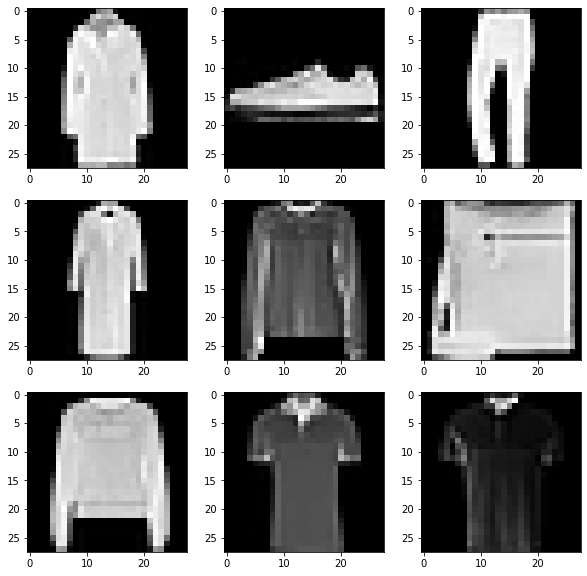

In [17]:
loader = DataLoader(dataset=ds, batch_size=256, shuffle=True)
batch = next(iter(loader))

fig = plt.figure(figsize=(10, 10))
for i in range(9):
  x = batch[0][i]
  ax = fig.add_subplot(3, 3, i+1)
  ax.imshow(x.squeeze(), cmap="gray")
fig.show()